# Data import

In [ ]:
import pandas as pd

df = pd.read_csv(r'../data/DSA4263_FinancialFraudDataset.csv')

print("Dataset preview:")
print(df.head())
df.drop(['oldbalanceOrg', 
    'newbalanceOrig', 
    'oldbalanceDest', 
    'newbalanceDest'], axis=1, inplace=True)

Dataset preview:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  


# Data Cleaning

In [108]:
print("\nDataset Info:")
print(df.info())

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:", df.duplicated().sum())

#remove duplicates if any
df = df[df['isFraud'].notna()]

# Summary statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))

from sklearn.preprocessing import LabelEncoder
# Encode 'type' column
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])
df.head()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 7 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   nameOrig        object 
 4   nameDest        object 
 5   isFraud         int64  
 6   isFlaggedFraud  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 339.8+ MB
None

Missing Values:
step              0
type              0
amount            0
nameOrig          0
nameDest          0
isFraud           0
isFlaggedFraud    0
dtype: int64

Duplicate Rows: 0

Summary Statistics:
                step          type        amount     nameOrig     nameDest  \
count   6.362620e+06  6.362620e+06  6.362620e+06      6362620      6362620   
unique           NaN           NaN           NaN      6353307      2722362   
top              NaN           NaN           NaN  C1902386530  C1286084959   
freq             NaN 

,step,type,amount,nameOrig,nameDest,isFraud,isFlaggedFraud
0,1,3,9839.64,C1231006815,M1979787155,0,0
1,1,3,1864.28,C1666544295,M2044282225,0,0
2,1,4,181.00,C1305486145,C553264065,1,0
3,1,1,181.00,C840083671,C38997010,1,0
4,1,3,11668.14,C2048537720,M1230701703,0,0


# EDA

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Pie Chart to observe the class distribution in our dataset

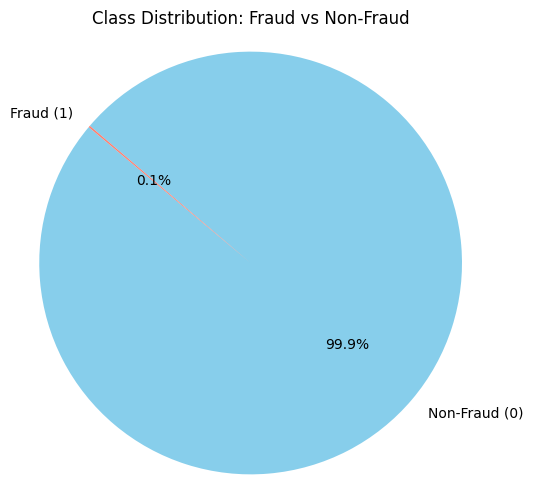

In [ ]:
# Count values
fraud_counts = df['isFraud'].value_counts()
labels = ['Non-Fraud (0)', 'Fraud (1)']
colors = ['skyblue', 'salmon']

# Create pie chart
plt.figure(figsize=(6,6))
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Class Distribution: Fraud vs Non-Fraud")
plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle.
plt.show()

Proportion of fraud cases in our dataset, shows a clear imbalance of class distribution.

This bar chart shows the counts of each transaction type.

It helps us understand the overall distribution of different transaction types in the dataset. If some types are more frequent than others, it could indicate common banking behaviors.

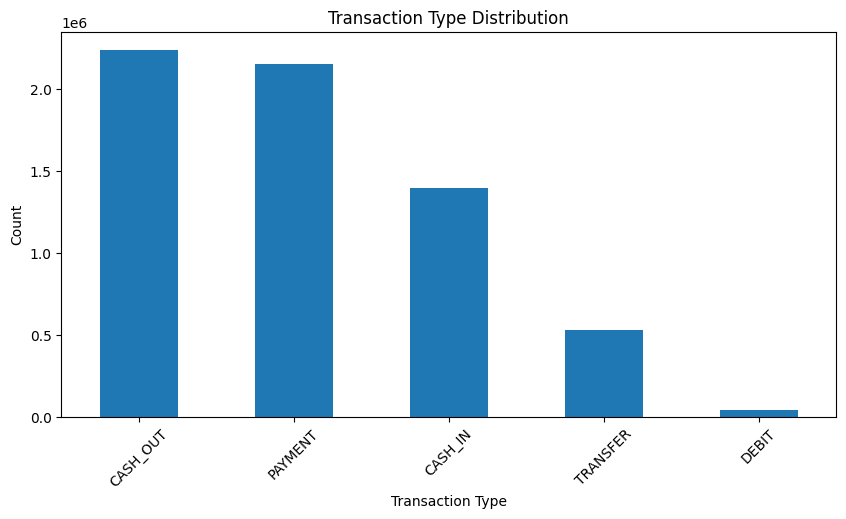

In [ ]:
# Distribution of transaction types
plt.figure(figsize=(10, 5))
df["type"].value_counts().plot(kind="bar", title="Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the number of fraud cases per transaction type.

It identifies which transaction types are most frequently involved in fraud.

Fraudulent transactions tend to cluster around specific types, such as TRANSFER or CASH_OUT, rather than normal PAYMENT transactions.

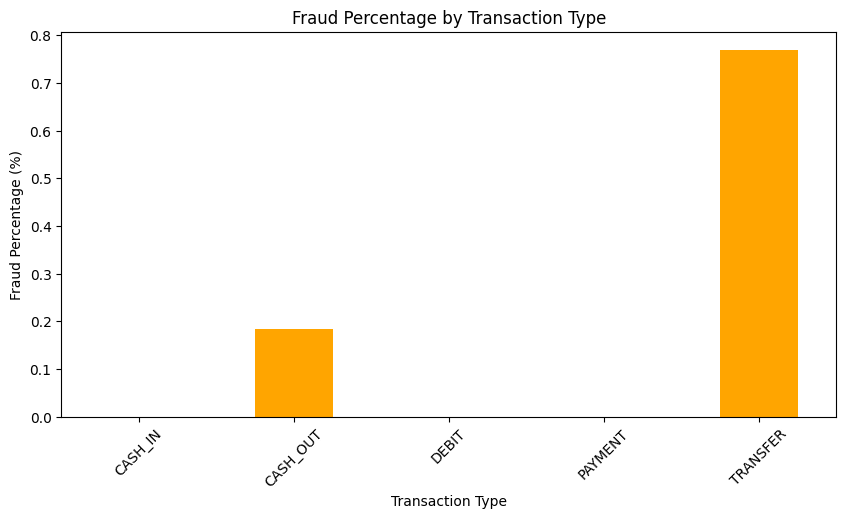

In [ ]:
# Fraud percentage by transaction type
fraud_percentage = df.groupby("type")["isFraud"].mean() * 100
plt.figure(figsize=(10, 5))
fraud_percentage.plot(kind="bar", color="orange", title="Fraud Percentage by Transaction Type")
plt.xlabel("Transaction Type")
plt.ylabel("Fraud Percentage (%)")
plt.xticks(rotation=45)
plt.show()

This bar chart shows the fraud percentage per transaction type.

This metric normalizes the fraud cases by calculating the percentage of fraudulent transactions within each type. Even if a transaction type has fewer fraud cases overall, a high fraud percentage means it is disproportionately risky.

From here, we can see that fraud is highly concentrated in TRANSFER transactions, indicating that fraudsters prefer to move money quickly between accounts to avoid detection. CASH_OUT transactions also show fraudulent activity. Other transaction types (CASH_IN, DEBIT, PAYMENT) have no fraud, meaning they are less likely to be manipulated.

**The overall dataset is highly imbalanced, with fraudulent transactions making up only a small percentage of all transactions, which may impact the effectiveness of fraud detection models.**



### Correlation Heatmap

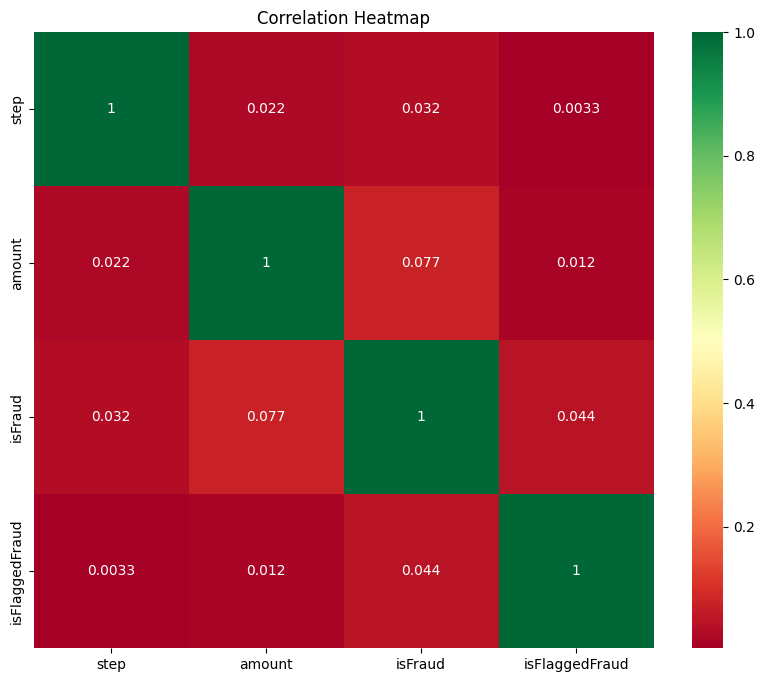

In [ ]:
# Optional: only keep numeric columns
numeric_df = df.select_dtypes(include='number')
# Compute correlation matrix
corr_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
color=plt.get_cmap('RdYlGn')
color.set_bad('lightblue')
sns.heatmap(corr_matrix, annot=True, cmap=color)
plt.title("Correlation Heatmap")
plt.show()

Based on the correlation heatmap, none of the variables are strongly correlated with fraud. Since the correlations are weak, we can see that fraud detection does not follow simple trends detectable by linear relationships. 

Therefore, non-linear models such as Random Forest, XGBoost or ensemble methods are better suited for this dataset. 

## Analysing each feature

### Analysing "amount" and observing its distribution

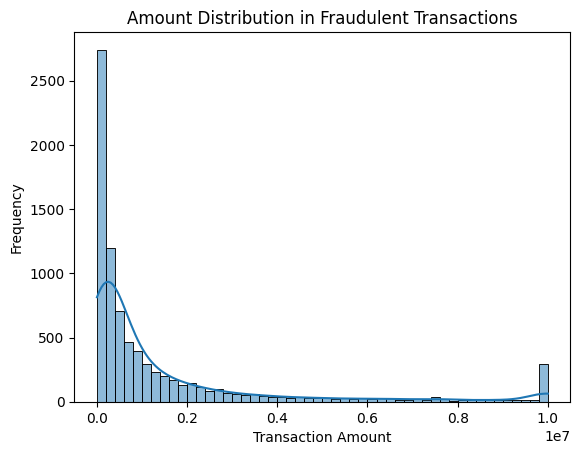

In [107]:
# Plot histograms before log-transformed data
sns.histplot(fraud_df['amount'], bins=50, kde=True)
plt.title("Amount Distribution in Fraudulent Transactions")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()


Based on the histogram shown above, we can see that amount contains extreme outliers and high skewness. The presence of large values distorts the distribution, making it difficult to analyze patterns effectively.

By applying a logarithmic transformation (log10) to these attributes, we:
- Reduce skewness → Distributions become more symmetric and easier to interpret.
- Compress extreme values → Large transactions don’t dominate the visualization.
- Improve model performance → Many machine learning models work better with normally distributed data.

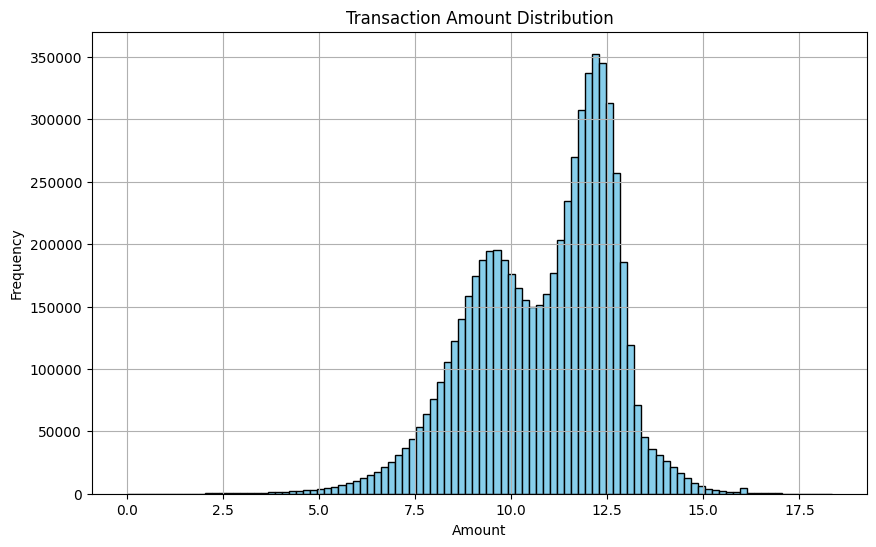

In [ ]:
columns_to_log = ['amount']

# Apply log transformation (log) to avoid extreme values
df_log = df.copy()
df_log[columns_to_log] = np.log(df[columns_to_log]+1)
                                
plt.figure(figsize=(10, 6))
plt.hist(df_log['amount'], bins=100, color='skyblue', edgecolor='black')
plt.title("Transaction Amount Distribution")
plt.xlabel("Amount")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


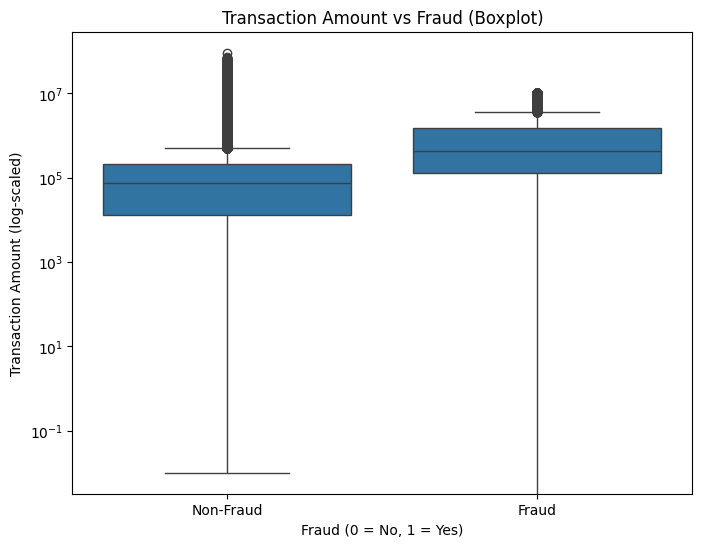

In [73]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="isFraud", y="amount", data=df)
plt.title("Transaction Amount vs Fraud (Boxplot)")
plt.xlabel("Fraud (0 = No, 1 = Yes)")
plt.ylabel("Transaction Amount (log-scaled)")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.yscale("log")  # Apply log scale to better visualize large values
plt.show()

### Analysing the signifance of "isFlaggedFraud" as a feature

In [69]:
print(df['isFlaggedFraud'].value_counts(normalize=True))

isFlaggedFraud
0    0.999997
1    0.000003
Name: proportion, dtype: float64


In [70]:
pd.crosstab(df['isFlaggedFraud'], df['isFraud'], margins=True)

isFraud,0,1,All
isFlaggedFraud,,,
0,6354407,8197,6362604
1,0,16,16
All,6354407,8213,6362620


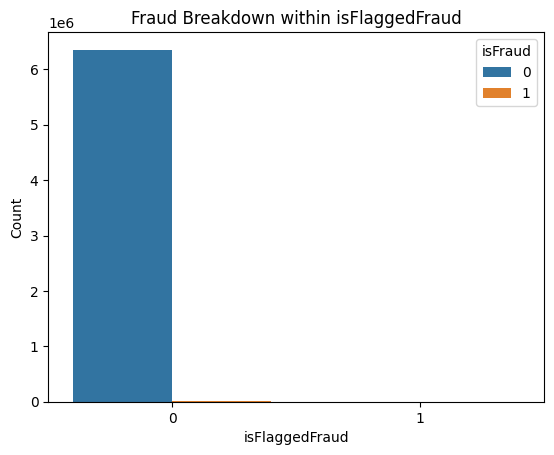

In [ ]:
sns.countplot(x='isFlaggedFraud', hue='isFraud', data=df_corr)
plt.title("Fraud Breakdown within isFlaggedFraud")
plt.xlabel("isFlaggedFraud")
plt.ylabel("Count")
plt.legend(title='isFraud')
plt.show()

### Analysing the distribution of "step"

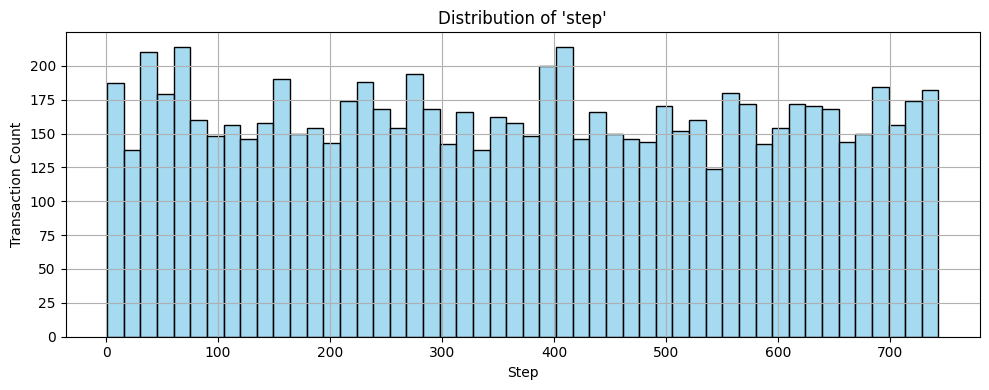

In [ ]:
# Adjust as needed for your DataFrame
fraud = df[df["isFraud"] == 1]  # Or whatever your DataFrame is named

# 1. Distribution of 'step'
plt.figure(figsize=(10, 4))
sns.histplot(fraud['step'], bins=50, kde=False, color='skyblue')
plt.title("Distribution of 'step'")
plt.xlabel("Step")
plt.ylabel("Transaction Count")
plt.grid(True)
plt.tight_layout()
plt.show()


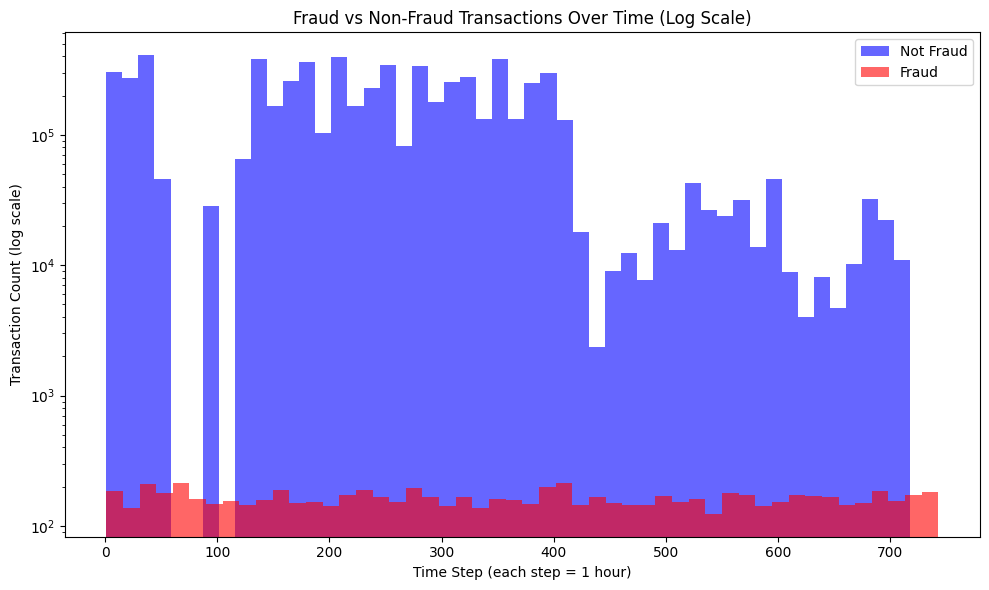

In [ ]:
# Split fraud and non-fraud
fraud = df[df['isFraud'] == 1]
non_fraud = df[df['isFraud'] == 0]

# Plot both with log scale
plt.figure(figsize=(10, 6))
plt.hist(non_fraud['step'], bins=50, alpha=0.6, label='Not Fraud', color='blue')
plt.hist(fraud['step'], bins=50, alpha=0.6, label='Fraud', color='red')
plt.yscale('log')  # Log scale to highlight small fraud counts
plt.title('Fraud vs Non-Fraud Transactions Over Time (Log Scale)')
plt.xlabel('Time Step (each step = 1 hour)')
plt.ylabel('Transaction Count (log scale)')
plt.legend()
plt.tight_layout()
plt.show()

# Baseline Models on Raw dataset & Results

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)

data = df.copy()
data.drop(['nameOrig', 'nameDest'], axis=1, inplace=True) #Drop identifier columns as they don't add predictive value

#### Define features and target
X = data.drop(['isFraud'], axis=1)
y = data['isFraud']

#### Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

#### Define helper function to evaluate and plot model
def evaluate_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]

    print("=" * 60)
    print(f"Model: {model_name}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    auc = roc_auc_score(y_test, y_proba)
    print(f"AUC Score: {auc:.4f}")

### Train and evaluate each model

# Logistic Regression 
lr_model = LogisticRegression(max_iter=1000)
evaluate_model(lr_model, "Logistic Regression")

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
evaluate_model(rf_model, "Random Forest")

# Decision Tree 
dt_model = DecisionTreeClassifier(random_state=42)
evaluate_model(dt_model, "Decision Tree")

# XGBoost (
xgb_model = XGBClassifier(
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)
evaluate_model(xgb_model, "XGBoost")

Model: Logistic Regression
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.00      0.00      0.00      2464

    accuracy                           1.00   1908786
   macro avg       0.50      0.50      0.50   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906272      50]
 [   2464       0]]
AUC Score: 0.7427
Model: Random Forest
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.81      0.36      0.50      2464

    accuracy                           1.00   1908786
   macro avg       0.90      0.68      0.75   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906110     212]
 [   1573     891]]
AUC Score: 0.8339
Model: Decision Tree
Classification Report:
               precision    recall  f1-score   support

/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:42:15] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBoost
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00   1906322
           1       0.93      0.19      0.31      2464

    accuracy                           1.00   1908786
   macro avg       0.96      0.59      0.66   1908786
weighted avg       1.00      1.00      1.00   1908786

Confusion Matrix:
 [[1906286      36]
 [   2003     461]]
AUC Score: 0.9703


In [106]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, roc_auc_score

# Define custom scoring for both classes
scoring = {
    'roc_auc': 'roc_auc',
    'precision_class1': make_scorer(precision_score, pos_label=1),
    'recall_class1': make_scorer(recall_score, pos_label=1),
    'f1_class1': make_scorer(f1_score, pos_label=1),
    'precision_class0': make_scorer(precision_score, pos_label=0),
    'recall_class0': make_scorer(recall_score, pos_label=0),
    'f1_class0': make_scorer(f1_score, pos_label=0)
}

# Evaluation function with average ± std reporting
def evaluate_model_avg_cv(model, model_name, X, y, cv=5):
    skf = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    scores = cross_validate(model, X, y, cv=skf, scoring=scoring, return_train_score=False)

    print("=" * 60)
    print(f"Model: {model_name} — Average CV Performance ({cv} folds)\n")

    for metric_key in scoring.keys():
        base_metric = metric_key.replace('_class1', '').replace('_class0', '').upper()
        class_label = " (class 1)" if 'class1' in metric_key else (" (class 0)" if 'class0' in metric_key else "")
        values = scores[f'test_{metric_key}']
        print(f"{base_metric + class_label:<25}: {np.mean(values):.4f} ± {np.std(values):.4f}")

evaluate_model_avg_cv(lr_model, "Logistic Regression", X, y)
evaluate_model_avg_cv(rf_model, "Random Forest", X, y)
evaluate_model_avg_cv(dt_model, "Decision Tree", X, y)
evaluate_model_avg_cv(xgb_model, "XGBoost", X, y)

Model: Logistic Regression — Average CV Performance (5 folds)

ROC_AUC                  : 0.6651 ± 0.1723
PRECISION (class 1)      : 0.0000 ± 0.0000
RECALL (class 1)         : 0.0000 ± 0.0000
F1 (class 1)             : 0.0000 ± 0.0000
PRECISION (class 0)      : 0.9987 ± 0.0000
RECALL (class 0)         : 1.0000 ± 0.0000
F1 (class 0)             : 0.9993 ± 0.0000
Model: Random Forest — Average CV Performance (5 folds)

ROC_AUC                  : 0.8358 ± 0.0071
PRECISION (class 1)      : 0.7993 ± 0.0214
RECALL (class 1)         : 0.3688 ± 0.0124
F1 (class 1)             : 0.5045 ± 0.0128
PRECISION (class 0)      : 0.9992 ± 0.0000
RECALL (class 0)         : 0.9999 ± 0.0000
F1 (class 0)             : 0.9995 ± 0.0000
Model: Decision Tree — Average CV Performance (5 folds)

ROC_AUC                  : 0.7425 ± 0.0107
PRECISION (class 1)      : 0.4960 ± 0.0174
RECALL (class 1)         : 0.4857 ± 0.0213
F1 (class 1)             : 0.4908 ± 0.0188
PRECISION (class 0)      : 0.9993 ± 0.0000
RECALL

/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:55:43] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:55:49] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:55:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [15:56:00] WARNING: /Users/runner/work/xgboost

Model: XGBoost — Average CV Performance (5 folds)

ROC_AUC                  : 0.9717 ± 0.0014
PRECISION (class 1)      : 0.9024 ± 0.0094
RECALL (class 1)         : 0.1935 ± 0.0088
F1 (class 1)             : 0.3185 ± 0.0119
PRECISION (class 0)      : 0.9990 ± 0.0000
RECALL (class 0)         : 1.0000 ± 0.0000
F1 (class 0)             : 0.9995 ± 0.0000


# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode 'type' column
label_encoder = LabelEncoder()
data['type'] = label_encoder.fit_transform(data['type'])

# Step 2: Split features and target
X = data.drop(columns=['isFraud'])
y = data['isFraud']

# Step 3: Train-test split (before SMOTE)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)
print("\nBefore SMOTE (Training set):")
print(y_train.value_counts())


Train shape: (4453834, 4)
Test shape: (1908786, 4)

Before SMOTE (Training set):
isFraud
0    4448085
1       5749
Name: count, dtype: int64


## Feature Engineering

In [ ]:
from scipy.stats import zscore

# Copy dataset to avoid messing with original
df_fe = data.copy()

# 1. Dropping isflaggedfraud
df_fe.drop(columns=[
    'isFlaggedFraud'], inplace=True)

# 3. Feature: isHighAmount (binary flag)
df_fe['isHighAmount'] = (df_fe['amount'] > 200000).astype(int)

# 4. Feature: log_amount (add 1 to avoid log(0), handle skew)
df_fe['log_amount'] = np.log1p(df_fe['amount'])

# 7. Feature: type_encoded (convert type to numeric)
df_fe['type_encoded'] = df_fe['type'].astype('category').cat.codes

# 8. Feature: amount_zscore (within each type category)
df_fe['amount_zscore'] = df_fe.groupby('type')['amount'].transform(lambda x: zscore(x, ddof=0))

# 9. Drop original 'type' column if you now prefer using type_encoded
df_fe.drop(columns=['type'], inplace=True)

print(df_fe.head())

   step    amount  isFraud  isHighAmount  log_amount  type_encoded  \
0     1   9839.64        0             0    9.194276             3   
1     1   1864.28        0             0    7.531166             3   
2     1    181.00        1             0    5.204007             4   
3     1    181.00        1             0    5.204007             1   
4     1  11668.14        0             0    9.364703             3   

   amount_zscore  
0      -0.256280  
1      -0.891440  
2      -0.484401  
3      -1.004353  
4      -0.110657  


#### Checking the distribution of the transformed amount

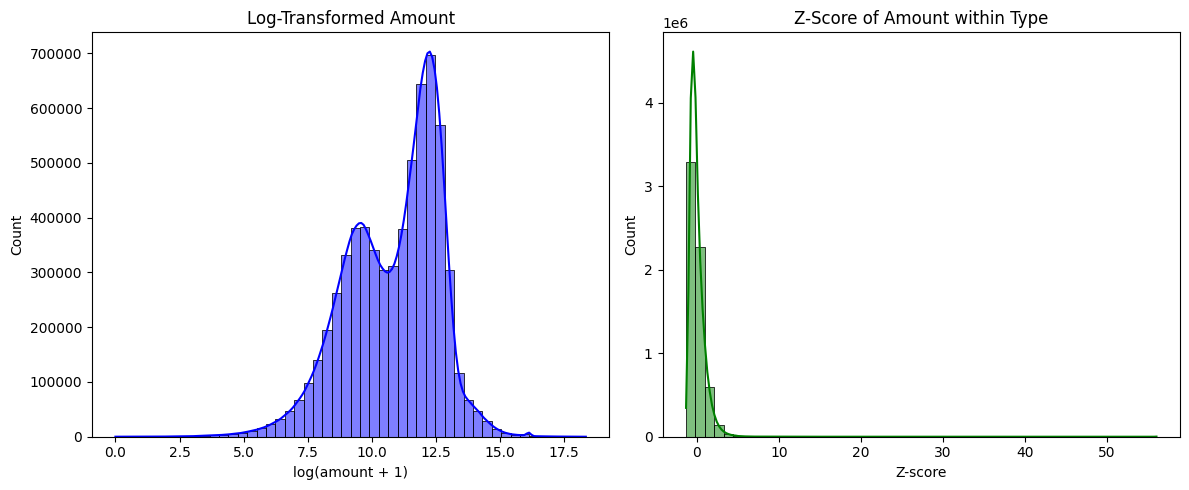

In [84]:
# Plotting
plt.figure(figsize=(12, 5))

# Log-transformed amount
plt.subplot(1, 2, 1)
sns.histplot(df_fe['log_amount'], bins=50, kde=True, color='blue')
plt.title('Log-Transformed Amount')
plt.xlabel('log(amount + 1)')

# Z-score of amount
plt.subplot(1, 2, 2)
sns.histplot(df_fe['amount_zscore'], bins=50, kde=True, color='green')
plt.title('Z-Score of Amount within Type')
plt.xlabel('Z-score')

plt.tight_layout()
plt.show()

# Handling Imbalance through smote

In [98]:
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
import pandas as pd

# Combine training data
train_df = pd.concat([X_train, y_train], axis=1)

# Separate classes
fraud = train_df[train_df['isFraud'] == 1]
non_fraud = train_df[train_df['isFraud'] == 0]

# Undersample class 0 to 1 million
non_fraud_downsampled = resample(
    non_fraud,
    replace=False,
    n_samples=1_000_000,
    random_state=42
)

# Combine for intermediate dataset
intermediate = pd.concat([fraud, non_fraud_downsampled])
X_balanced = intermediate.drop(columns='isFraud')
y_balanced = intermediate['isFraud']

# SMOTE to balance fraud up to 1 million
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_balanced, y_balanced)

# Check
print("Final Resampled Training shape:", X_train_resampled.shape)
print("Class Distribution:\n", pd.Series(y_train_resampled).value_counts())


Final Resampled Training shape: (2000000, 4)
Class Distribution:
 isFraud
1    1000000
0    1000000
Name: count, dtype: int64


/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# Hyperparameter Tuning

In [86]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "n_estimators": [100, 200],
    "max_depth": [4, 6, 8],
    "learning_rate": [0.01, 0.1, 0.2],
    "subsample": [0.6, 0.8, 1.0]
}

search = RandomizedSearchCV(
    estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    param_distributions=param_grid,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train_resampled, y_train_resampled)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:56:57] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [22:56:57] WARNING: /Users/runner/work/xgboost

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='logloss',
                                           feature_types=None, gamma=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.1, 0.2],
                                        'max_depth': [4, 6, 8],
                                        'n_estimators': [100, 200],
                                        'subsample': [0.6, 0.8, 1.0]},
                   scoring='f1', verbose=1)

In [101]:
from sklearn.ensemble import RandomForestClassifier
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
rf_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(),
    param_distributions=rf_param_grid,
    n_iter=10,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)

rf_search.fit(X_train_resampled, y_train_resampled)

# compare both results
print("Best XGB F1 Score:", search.best_score_)
print("Best XGB Params:", search.best_params_)

print("Best RF F1 Score:", rf_search.best_score_)
print("Best RF Params:", rf_search.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best XGB F1 Score: 0.9207595314785703
Best XGB Params: {'subsample': 0.6, 'n_estimators': 100, 'max_depth': 8, 'learning_rate': 0.2}
Best RF F1 Score: 0.9510643501333785
Best RF Params: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'bootstrap': True}


# New Models

## XGBoost

In [109]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, recall_score,
    precision_score, f1_score, accuracy_score, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score, average_precision_score # Added missing metrics
)
from xgboost import XGBClassifier
# NOTE: No need for imblearn.pipeline or SMOTE imports here

# Assume X_train_resampled, y_train_resampled are available (approx 2M balanced rows)
# Assume X_test, y_test are available (original imbalanced test set)

# --- Model Definition ---
model_name = "XGBoost"
# Define model - XGBoost generally doesn't need class_weight when data is balanced
# Ensure tree_method is suitable for your environment if needed (e.g., 'hist' for large data)
model = XGBClassifier(
    subsample=0.6,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
) 

# --- Cross-Validation Setup ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Lists to Store Metrics ---
# Class 1 (Fraud)
recalls_fraud, precisions_fraud, f1s_fraud = [], [], []
# Class 0 (Non-Fraud)
recalls_nonfraud, precisions_nonfraud, f1s_nonfraud = [], [], []
# Overall
aucs, accuracies, mccs, kappas, pr_aucs, balanced_accs = [], [], [], [], [], []

print(f"\n{'='*30} CV for {model_name} on Resampled Data {'='*30}")

# --- Cross-Validation Loop ---
# IMPORTANT: Loop over the RESAMPLED training data
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_resampled, y_train_resampled), 1):
    # Indexing data
    if isinstance(X_train_resampled, pd.DataFrame):
        X_train_cv, X_val_cv = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    else: # Assuming numpy array
        X_train_cv, X_val_cv = X_train_resampled[train_idx], X_train_resampled[val_idx]

    if isinstance(y_train_resampled, pd.Series):
        y_train_cv, y_val_cv = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]
    else: # Assuming numpy array
        y_train_cv, y_val_cv = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # --- Fit the model directly (NO SMOTE pipeline needed) ---
    # XGBoost doesn't typically require scaling
    model.fit(X_train_cv, y_train_cv)

    # --- Evaluate on the CV validation fold ---
    y_pred = model.predict(X_val_cv)
    y_proba = model.predict_proba(X_val_cv)[:, 1] # Probabilities for positive class

    # --- Calculate and Store Metrics ---
    # Use try-except blocks or zero_division parameter for robustness if needed
    try:
        # Class 1 (Fraud) Metrics
        recalls_fraud.append(recall_score(y_val_cv, y_pred, pos_label=1))
        precisions_fraud.append(precision_score(y_val_cv, y_pred, pos_label=1, zero_division=0))
        f1s_fraud.append(f1_score(y_val_cv, y_pred, pos_label=1, zero_division=0))

        # Class 0 (Non-Fraud) Metrics (Specificity is Recall for class 0)
        recalls_nonfraud.append(recall_score(y_val_cv, y_pred, pos_label=0))
        precisions_nonfraud.append(precision_score(y_val_cv, y_pred, pos_label=0, zero_division=0))
        f1s_nonfraud.append(f1_score(y_val_cv, y_pred, pos_label=0, zero_division=0))

        # Overall Metrics
        accuracies.append(accuracy_score(y_val_cv, y_pred))
        aucs.append(roc_auc_score(y_val_cv, y_proba))
        pr_aucs.append(average_precision_score(y_val_cv, y_proba)) # Added PR AUC
        balanced_accs.append(balanced_accuracy_score(y_val_cv, y_pred)) # Added Balanced Acc
        mccs.append(matthews_corrcoef(y_val_cv, y_pred))
        kappas.append(cohen_kappa_score(y_val_cv, y_pred))
    except Exception as e:
        print(f"Error calculating metrics in fold {fold}: {e}")
        # Append NaN or handle error as appropriate
        # (Example: append NaN to all lists for this fold)
        for lst in [recalls_fraud, precisions_fraud, f1s_fraud, recalls_nonfraud, precisions_nonfraud, f1s_nonfraud, accuracies, aucs, pr_aucs, balanced_accs, mccs, kappas]:
             lst.append(np.nan)


    # --- Print Fold Details (Optional) ---
    print(f"\n--- Fold {fold} Results ---")
    print("Confusion Matrix:")
    tn, fp, fn, tp = confusion_matrix(y_val_cv, y_pred).ravel()
    print(f"TN: {tn}, FP: {fp}")
    print(f"FN: {fn}, TP: {tp}")
    print("\nClassification Report (Per Fold):")
    print(classification_report(y_val_cv, y_pred, digits=4, zero_division=0))


# --- Report Average Metrics Across Folds ---
print(f"\n{'='*30} Average CV Metrics for {model_name} {'='*30}")
print("--- Performance on Class 1 (Fraud) ---")
print(f"Avg. Recall (Sensitivity): {np.nanmean(recalls_fraud):.4f}")
print(f"Avg. Precision:          {np.nanmean(precisions_fraud):.4f}")
print(f"Avg. F1 Score:           {np.nanmean(f1s_fraud):.4f}")
print("\n--- Performance on Class 0 (Non-Fraud) ---")
print(f"Avg. Recall (Specificity): {np.nanmean(recalls_nonfraud):.4f}")
print(f"Avg. Precision:            {np.nanmean(precisions_nonfraud):.4f}")
print(f"Avg. F1 Score:             {np.nanmean(f1s_nonfraud):.4f}")
print("\n--- Overall Performance Metrics ---")
print(f"Avg. Accuracy:           {np.nanmean(accuracies):.4f}")
print(f"Avg. ROC AUC:            {np.nanmean(aucs):.4f}")
print(f"Avg. PR AUC:             {np.nanmean(pr_aucs):.4f}") # Added PR AUC avg
print(f"Avg. Balanced Accuracy:  {np.nanmean(balanced_accs):.4f}") # Added Balanced Acc avg
print(f"Avg. MCC:                {np.nanmean(mccs):.4f}")
print(f"Avg. Cohen's Kappa:      {np.nanmean(kappas):.4f}")
print("="*70)

# Remember: Final evaluation should still be on the original X_test, y_test
# Train the final chosen model on ALL of X_train_resampled, y_train_resampled
# Then predict and evaluate on X_test, y_test


============================== CV for XGBoost on Resampled Data ==============================


/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:11:44] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Fold 1 Results ---
Confusion Matrix:
TN: 188407, FP: 11593
FN: 19532, TP: 180468

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9061    0.9420    0.9237    200000
           1     0.9396    0.9023    0.9206    200000

    accuracy                         0.9222    400000
   macro avg     0.9229    0.9222    0.9222    400000
weighted avg     0.9229    0.9222    0.9222    400000



/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:11:47] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Fold 2 Results ---
Confusion Matrix:
TN: 188724, FP: 11276
FN: 19687, TP: 180313

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9055    0.9436    0.9242    200000
           1     0.9411    0.9016    0.9209    200000

    accuracy                         0.9226    400000
   macro avg     0.9233    0.9226    0.9226    400000
weighted avg     0.9233    0.9226    0.9226    400000



/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:11:50] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Fold 3 Results ---
Confusion Matrix:
TN: 188505, FP: 11495
FN: 19489, TP: 180511

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9063    0.9425    0.9241    200000
           1     0.9401    0.9026    0.9210    200000

    accuracy                         0.9225    400000
   macro avg     0.9232    0.9225    0.9225    400000
weighted avg     0.9232    0.9225    0.9225    400000



/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:11:52] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Fold 4 Results ---
Confusion Matrix:
TN: 188487, FP: 11513
FN: 19635, TP: 180365

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9057    0.9424    0.9237    200000
           1     0.9400    0.9018    0.9205    200000

    accuracy                         0.9221    400000
   macro avg     0.9228    0.9221    0.9221    400000
weighted avg     0.9228    0.9221    0.9221    400000



/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:11:55] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



--- Fold 5 Results ---
Confusion Matrix:
TN: 188588, FP: 11412
FN: 19675, TP: 180325

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9055    0.9429    0.9239    200000
           1     0.9405    0.9016    0.9206    200000

    accuracy                         0.9223    400000
   macro avg     0.9230    0.9223    0.9222    400000
weighted avg     0.9230    0.9223    0.9222    400000


============================== Average CV Metrics for XGBoost ==============================
--- Performance on Class 1 (Fraud) ---
Avg. Recall (Sensitivity): 0.9020
Avg. Precision:          0.9403
Avg. F1 Score:           0.9207

--- Performance on Class 0 (Non-Fraud) ---
Avg. Recall (Specificity): 0.9427
Avg. Precision:            0.9058
Avg. F1 Score:             0.9239

--- Overall Performance Metrics ---
Avg. Accuracy:           0.9223
Avg. ROC AUC:            0.9793
Avg. PR AUC:             0.9814
Avg. Balanced Accuracy:  0.9223
Avg. MCC: 

## Random Forest

In [110]:
import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, recall_score,
    precision_score, f1_score, accuracy_score, matthews_corrcoef,
    cohen_kappa_score, balanced_accuracy_score, average_precision_score # Added metrics
)
from sklearn.ensemble import RandomForestClassifier # Import Random Forest
# NOTE: No need for imblearn.pipeline or SMOTE imports here
# NOTE: No need for StandardScaler as Random Forests are not sensitive to feature scaling

# Assume X_train_resampled, y_train_resampled are available (approx 2M balanced rows)
# Assume X_test, y_test are available (original imbalanced test set)

# --- Model Definition ---
model_name = "Random Forest"
# Define model - No class_weight needed as data is resampled
# Add n_jobs=-1 to use all available CPU cores for potentially faster training
model = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=None,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)

# --- Cross-Validation Setup ---
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- Lists to Store Metrics ---
# Class 1 (Fraud)
recalls_fraud, precisions_fraud, f1s_fraud = [], [], []
# Class 0 (Non-Fraud)
recalls_nonfraud, precisions_nonfraud, f1s_nonfraud = [], [], []
# Overall
aucs, accuracies, mccs, kappas, pr_aucs, balanced_accs = [], [], [], [], [], []

print(f"\n{'='*30} CV for {model_name} on Resampled Data {'='*30}")

# --- Cross-Validation Loop ---
# IMPORTANT: Loop over the RESAMPLED training data
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train_resampled, y_train_resampled), 1):
    # Indexing data
    if isinstance(X_train_resampled, pd.DataFrame):
        X_train_cv, X_val_cv = X_train_resampled.iloc[train_idx], X_train_resampled.iloc[val_idx]
    else: # Assuming numpy array
        X_train_cv, X_val_cv = X_train_resampled[train_idx], X_train_resampled[val_idx]

    if isinstance(y_train_resampled, pd.Series):
        y_train_cv, y_val_cv = y_train_resampled.iloc[train_idx], y_train_resampled.iloc[val_idx]
    else: # Assuming numpy array
        y_train_cv, y_val_cv = y_train_resampled[train_idx], y_train_resampled[val_idx]

    # --- Fit the model directly (NO SMOTE pipeline needed, no scaling needed) ---
    model.fit(X_train_cv, y_train_cv)

    # --- Evaluate on the CV validation fold ---
    y_pred = model.predict(X_val_cv)
    y_proba = model.predict_proba(X_val_cv)[:, 1] # Probabilities for positive class

    # --- Calculate and Store Metrics ---
    # Use try-except blocks or zero_division parameter for robustness if needed
    try:
        # Class 1 (Fraud) Metrics
        recalls_fraud.append(recall_score(y_val_cv, y_pred, pos_label=1))
        precisions_fraud.append(precision_score(y_val_cv, y_pred, pos_label=1, zero_division=0))
        f1s_fraud.append(f1_score(y_val_cv, y_pred, pos_label=1, zero_division=0))

        # Class 0 (Non-Fraud) Metrics (Specificity is Recall for class 0)
        recalls_nonfraud.append(recall_score(y_val_cv, y_pred, pos_label=0))
        precisions_nonfraud.append(precision_score(y_val_cv, y_pred, pos_label=0, zero_division=0))
        f1s_nonfraud.append(f1_score(y_val_cv, y_pred, pos_label=0, zero_division=0))

        # Overall Metrics
        accuracies.append(accuracy_score(y_val_cv, y_pred))
        aucs.append(roc_auc_score(y_val_cv, y_proba))
        pr_aucs.append(average_precision_score(y_val_cv, y_proba))
        balanced_accs.append(balanced_accuracy_score(y_val_cv, y_pred))
        mccs.append(matthews_corrcoef(y_val_cv, y_pred))
        kappas.append(cohen_kappa_score(y_val_cv, y_pred))
    except Exception as e:
        print(f"Error calculating metrics in fold {fold}: {e}")
        # Append NaN or handle error as appropriate
        for lst in [recalls_fraud, precisions_fraud, f1s_fraud, recalls_nonfraud, precisions_nonfraud, f1s_nonfraud, accuracies, aucs, pr_aucs, balanced_accs, mccs, kappas]:
             lst.append(np.nan)


    # --- Print Fold Details (Optional) ---
    print(f"\n--- Fold {fold} Results ---")
    print("Confusion Matrix:")
    tn, fp, fn, tp = confusion_matrix(y_val_cv, y_pred).ravel()
    print(f"TN: {tn}, FP: {fp}")
    print(f"FN: {fn}, TP: {tp}")
    print("\nClassification Report (Per Fold):")
    print(classification_report(y_val_cv, y_pred, digits=4, zero_division=0))


# --- Report Average Metrics Across Folds ---
print(f"\n{'='*30} Average CV Metrics for {model_name} {'='*30}")
print("--- Performance on Class 1 (Fraud) ---")
print(f"Avg. Recall (Sensitivity): {np.nanmean(recalls_fraud):.4f}")
print(f"Avg. Precision:          {np.nanmean(precisions_fraud):.4f}")
print(f"Avg. F1 Score:           {np.nanmean(f1s_fraud):.4f}")
print("\n--- Performance on Class 0 (Non-Fraud) ---")
print(f"Avg. Recall (Specificity): {np.nanmean(recalls_nonfraud):.4f}")
print(f"Avg. Precision:            {np.nanmean(precisions_nonfraud):.4f}")
print(f"Avg. F1 Score:             {np.nanmean(f1s_nonfraud):.4f}")
print("\n--- Overall Performance Metrics ---")
print(f"Avg. Accuracy:           {np.nanmean(accuracies):.4f}")
print(f"Avg. ROC AUC:            {np.nanmean(aucs):.4f}")
print(f"Avg. PR AUC:             {np.nanmean(pr_aucs):.4f}")
print(f"Avg. Balanced Accuracy:  {np.nanmean(balanced_accs):.4f}")
print(f"Avg. MCC:                {np.nanmean(mccs):.4f}")
print(f"Avg. Cohen's Kappa:      {np.nanmean(kappas):.4f}")
print("="*70)

# Remember: Final evaluation should still be on the original X_test, y_test


============================== CV for Random Forest on Resampled Data ==============================

--- Fold 1 Results ---
Confusion Matrix:
TN: 189622, FP: 10378
FN: 8385, TP: 191615

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9577    0.9481    0.9529    200000
           1     0.9486    0.9581    0.9533    200000

    accuracy                         0.9531    400000
   macro avg     0.9531    0.9531    0.9531    400000
weighted avg     0.9531    0.9531    0.9531    400000


--- Fold 2 Results ---
Confusion Matrix:
TN: 189755, FP: 10245
FN: 8659, TP: 191341

Classification Report (Per Fold):
              precision    recall  f1-score   support

           0     0.9564    0.9488    0.9526    200000
           1     0.9492    0.9567    0.9529    200000

    accuracy                         0.9527    400000
   macro avg     0.9528    0.9527    0.9527    400000
weighted avg     0.9528    0.9527    0.9527    400000


---

## Final Prediction on raw dataset

In [111]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, 
    average_precision_score, accuracy_score, f1_score, precision_score, recall_score
)

# === FINAL RANDOM FOREST EVALUATION (TUNED) ===

rf_final = RandomForestClassifier(
    n_estimators=100,
    min_samples_split=5,
    min_samples_leaf=1,
    max_depth=None,
    bootstrap=True,
    n_jobs=-1,
    random_state=42
)
rf_final.fit(X_train_resampled, y_train_resampled)

y_pred_rf = rf_final.predict(X_test)
y_proba_rf = rf_final.predict_proba(X_test)[:, 1]

print("\n🌲 Final Evaluation: Random Forest (Tuned)")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, digits=4, zero_division=0))
print(f"AUC:      {roc_auc_score(y_test, y_proba_rf):.4f}")
print(f"PR AUC:   {average_precision_score(y_test, y_proba_rf):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_rf):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_rf):.4f}")
print(f"Precision:{precision_score(y_test, y_pred_rf):.4f}")


# === FINAL XGBOOST EVALUATION (TUNED) ===

xgb_final = XGBClassifier(
    subsample=0.6,
    n_estimators=100,
    max_depth=8,
    learning_rate=0.2,
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    n_jobs=-1
)
xgb_final.fit(X_train_resampled, y_train_resampled)

y_pred_xgb = xgb_final.predict(X_test)
y_proba_xgb = xgb_final.predict_proba(X_test)[:, 1]

print("\n🚀 Final Evaluation: XGBoost (Tuned)")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb, digits=4, zero_division=0))
print(f"AUC:      {roc_auc_score(y_test, y_proba_xgb):.4f}")
print(f"PR AUC:   {average_precision_score(y_test, y_proba_xgb):.4f}")
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_xgb):.4f}")
print(f"Recall:   {recall_score(y_test, y_pred_xgb):.4f}")
print(f"Precision:{precision_score(y_test, y_pred_xgb):.4f}")


🌲 Final Evaluation: Random Forest (Tuned)
Confusion Matrix:
[[1810598   95724]
 [    656    1808]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9996    0.9498    0.9741   1906322
           1     0.0185    0.7338    0.0362      2464

    accuracy                         0.9495   1908786
   macro avg     0.5091    0.8418    0.5051   1908786
weighted avg     0.9984    0.9495    0.9729   1908786

AUC:      0.9341
PR AUC:   0.1359
Accuracy: 0.9495
F1 Score: 0.0362
Recall:   0.7338
Precision:0.0185


/Users/joeylee/Documents/NUSAY2425/DSA4263/dsa4263venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [16:22:08] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



🚀 Final Evaluation: XGBoost (Tuned)
Confusion Matrix:
[[1796228  110094]
 [    439    2025]]

Classification Report:
              precision    recall  f1-score   support

           0     0.9998    0.9422    0.9702   1906322
           1     0.0181    0.8218    0.0353      2464

    accuracy                         0.9421   1908786
   macro avg     0.5089    0.8820    0.5027   1908786
weighted avg     0.9985    0.9421    0.9689   1908786

AUC:      0.9602
PR AUC:   0.4358
Accuracy: 0.9421
F1 Score: 0.0353
Recall:   0.8218
Precision:0.0181
